In [36]:
import pandas as pd
import numpy as np
import re
from copy import copy

# Пункт  a

In [37]:
df = pd.read_csv('Emails.csv')

In [38]:
df

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 

# Пункт b

In [39]:
df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

# Пункт c

In [40]:
temp = df[['MetadataSubject', 'SenderPersonId', 'MetadataDateSent', 'ExtractedBodyText']].dropna()

In [41]:
temp

,MetadataSubject,SenderPersonId,MetadataDateSent,ExtractedBodyText
2,CHRIS STEVENS,32.0,2012-09-12T04:00:00+00:00,Thx
4,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,80.0,2011-03-11T05:00:00+00:00,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,80.0,2012-09-12T04:00:00+00:00,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
7,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,80.0,2011-03-11T05:00:00+00:00,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
8,SECRETARY'S REMARKS,87.0,2012-09-12T04:00:00+00:00,FYI
10,ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA,87.0,2011-03-13T05:00:00+00:00,Fyi\nB6\n— —
12,HEY,87.0,2012-09-12T04:00:00+00:00,Fyi
13,PIECE ON LIBYA NFZ THAT WILL APPEAR ON NYT OP-...,10.0,2011-03-13T05:00:00+00:00,"Anne-Marie Slaughter\nSunday, March 13, 2011 9..."
14,NOT A DRY EYE IN NEA,32.0,2012-09-12T04:00:00+00:00,"_ .....\nFrom Randolph, Lawrence M\nSent: Wedn..."
15,THANK YOU,77.0,2012-09-12T04:00:00+00:00,I asked to attend your svtc today with Embassy...


In [42]:
new_df = copy(df.RawText)

In [43]:
weeks_days =  '|'.join(['Monday' , 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
months = '|'.join(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December'])
time = '[0-9]{1,2}, 20[0-9]{2} [0-9]{1,2}:[0-9]{2} AM'
time2 = '[0-9]{1,2}, 20[0-9]{2} [0-9]{1,2}:[0-9]{2} PM'
date = '[0-9]{2}/[0-9]{2}/[0-9]{4}'
number = 'No. [A-Z][0-9,-]*'

In [44]:
def does_not_contain_trash(phrase, trash = {'Case', 'From', 'To', 'UNCLASSIFIED', 
                                            'Sent', 'Date', 'Doc', 'U.S. Department',
                                           'STATE DEPT', 'SUBJECT TO', 'RELEASE', '\x0c',
                                            'March', 'January', 'February', 'April', 'May',
                                           'June', 'July', 'August', 'September', 'October',
                                           'November', 'December', 'Cc', 'Monday', 'Tuesday', 
                                           'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                                            'Sunday', 'Re', 'cc'}):
    for tr in trash:
        if phrase.startswith(tr):
            return False
    
    return True

In [45]:
def delete_trash(phrase, trash_patterns = {'Subject:', 'Subject', 'Case', 'From', 'To', 'UNCLASSIFIED',
                                            'Sent:', 'Date', 'Doc', 'U.S. Department',
                                           'STATE DEPT', 'SUBJECT TO', 'RELEASE', '\x0c', 'Fw:',
                                            'Cc',  'Re', 'cc', '\<(.*?)\>', 'H',
                                           '\n\n', number, ':{\s}{>0}\n', ',{\s}{>1}', '{\s}{>1}', '{\n}{>1}', 
                                          time}):
    for tr in trash_patterns:
        phrase = re.sub(tr, '', phrase)
    return phrase

In [46]:
def not_space(phrase):
    return phrase != ' ' and phrase != ''

In [47]:
new_df = map(lambda s: filter(does_not_contain_trash, s), df.RawText)

In [48]:
new_df = map(lambda s: filter(not_space, s), new_df)

In [49]:
new_df = map(lambda s: map(lambda t: delete_trash(t), s), new_df)

In [50]:
new_df = map(lambda s: ' '.join(s), new_df)

In [51]:
temp.ExtractedBodyText = temp.ExtractedBodyText.apply(delete_trash)

# Пункт d

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
corp = CountVectorizer(ngram_range=(2, 2)).fit_transform(temp.ExtractedBodyText)
res = np.array(corp.sum(axis=0))[0]
res.argmax()

148530

In [70]:
filter(lambda s: CountVectorizer(ngram_range=(2, 2)).vocabulary[s] == res.argmax(), CountVectorizer(ngram_range=(2, 2)).vocabulary.keys())

AttributeError: 'NoneType' object has no attribute 'keys'

# Пункт e

In [71]:
with open('hw2.txt', 'w') as f:
    for text in new_df:
        for word in text.split():
            f.write(word + '\n')

In [75]:
import nltk
from nltk.collocations import *

In [76]:
finder = BigramCollocationFinder.from_words(nltk.corpus.genesis.words('./hillary_letters.txt'), window_size=2)
bigram_measures = nltk.collocations.BigramAssocMeasures()

LookupError: 
**********************************************************************
  Resource u'corpora/genesis' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/Users/user/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [ ]:
for bigram in finder.nbest(bigram_measures.pmi, 10):
    print bigram[0], bigram[1]

# Пункт f

In [77]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [97]:
corp = TfidfVectorizer(max_features=1000).fit_transform(df)

In [98]:
%time y = KMeans(n_clusters=3).fit_predict(corp)

CPU times: user 74.5 ms, sys: 13.5 ms, total: 88.1 ms
Wall time: 80 ms


In [99]:
X_tsne = TSNE().fit_transform(corp.todense())

In [100]:
from random import choice
import numpy as np
import matplotlib as plt
from sklearn.metrics import silhouette_score, silhouette_samples
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [101]:
cm?

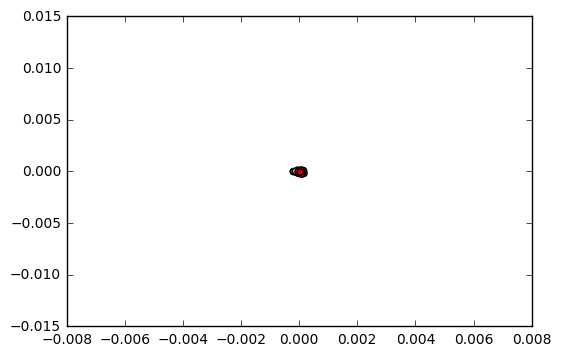

In [110]:
color_dict = cm.hot(np.linspace(0.3, 0.9, 3))
plt.figure()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color_dict[y])
plt.show()

In [107]:
silhouette_score(corp, y)

-2.8547135612432271e-16

# Пункт g